In [1]:
import matplotlib
import numpy as np
from os import listdir
from os.path import isfile, join
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
hi_ib_path = "/home/tgroves/projects/gpu-comm/results/summit/host/standard/ib/04-02-20:15.33.00/host/ib_read_bw.xnode"
di_nv_path = "/home/tgroves/projects/gpu-comm/results/summit/device/standard/nvshmem/02-20-20.14.04.48/nvtests/device/shmem_get_bw.out"
hi_nv_path = "/home/tgroves/projects/gpu-comm/results/summit/host/standard/nvshmem/02-20-20.14.04.48/nvtests/host/bw.out"

In [3]:
results = {}

#IB format
#bytes     #iterations    BW peak[MB/sec]    BW average[MB/sec]   MsgRate[Mpps]
p = hi_ib_path
results[p] = {}
with open(p, 'r') as f:
    for line in f.readlines():
        tmp = line.split()
        if tmp != []:
            if tmp[0].isdigit():
                if int(tmp[0]) < 8192:
                    results[p][tmp[0]] = float(tmp[3])/1024 

#NV DI format
#Size(Bytes)    BW(GB/sec)
p = di_nv_path
results[p] = {}
with open(p, 'r') as f:
    for line in f.readlines():
        tmp = line.split()
        if tmp != []:
            if tmp[0].isdigit():
                if int(tmp[0]) < 8388608:
                    results[p][tmp[0]] = float(tmp[1])
                    
#NV HI format
#Size(Bytes)    BW(GB/sec)
p = hi_nv_path
results[p] = {}
with open(p, 'r') as f:
    for line in f.readlines():
        tmp = line.split()
        if tmp != []:
            if tmp[0].isdigit():
                if int(tmp[0]) < 32768:
                    results[p][tmp[0]] = float(tmp[1])

In [4]:
for k in results.keys():
    print(k)
    for kk in results[k].keys():
        print("{}, {}".format(kk, results[k][kk]))

/home/tgroves/projects/gpu-comm/results/summit/host/standard/ib/04-02-20:15.33.00/host/ib_read_bw.xnode
2, 0.009697265625
4, 0.019912109375
8, 0.04044921875
16, 0.081025390625
32, 0.1620703125
64, 0.3249609375
128, 0.649931640625
256, 1.300029296875
512, 2.59337890625
1024, 5.162734375
2048, 8.785546875
4096, 10.68306640625
/home/tgroves/projects/gpu-comm/results/summit/device/standard/nvshmem/02-20-20.14.04.48/nvtests/device/shmem_get_bw.out
8, 0.00456
16, 0.00927
32, 0.00568
64, 0.01135
128, 0.02258
256, 0.04483
512, 0.07668
1024, 0.15458
2048, 0.30902
4096, 0.61798
8192, 1.1107
16384, 1.81281
32768, 2.50784
65536, 3.57802
131072, 4.8201
262144, 6.78027
524288, 8.02218
1048576, 8.76969
2097152, 9.8322
4194304, 10.34167
/home/tgroves/projects/gpu-comm/results/summit/host/standard/nvshmem/02-20-20.14.04.48/nvtests/host/bw.out
4, 0.01
8, 0.02
16, 0.03
32, 0.06
64, 0.13
128, 0.26
256, 0.52
512, 1.01
1024, 1.99
2048, 3.67
4096, 6.47
8192, 9.78
16384, 10.67


2, 103.12185297079557
4, 50.220696419813635
8, 24.72235634958957
16, 12.341810292876943
32, 6.170161484695107
64, 3.077292943863445
128, 1.5386233528165523
256, 0.7692134341924386
512, 0.38559733696839155
1024, 0.19369580678843273
2048, 0.11382330710061803
4096, 0.09360608293279558
4, 100.0
8, 50.0
16, 33.333333333333336
32, 16.666666666666668
64, 7.6923076923076925
128, 3.8461538461538463
256, 1.9230769230769231
512, 0.9900990099009901
1024, 0.5025125628140703
2048, 0.2724795640326976
4096, 0.1545595054095827
8192, 0.10224948875255624
16384, 0.09372071227741331
8, 219.2982456140351
16, 107.87486515641855
32, 176.05633802816902
64, 88.10572687224669
128, 44.28697962798937
256, 22.30649118893598
512, 13.041210224308816
1024, 6.469142191745375
2048, 3.236036502491748
4096, 1.6181753454804362
8192, 0.9003331232556046
16384, 0.5516297902151908
32768, 0.3987495215005742
65536, 0.279484183990028
131072, 0.20746457542374638
262144, 0.1474867520025014
524288, 0.12465439568795512
1048576, 0.114

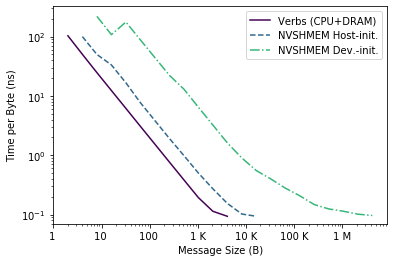

In [14]:
from numpy.polynomial import polynomial as P
def log_10_product(x, pos):
    """The two args are the value and tick position.
    Label ticks with the product of the exponentiation"""
    count = 0
    prefix = ["", "K", "M", "G", "T"]
    while x >= 1000:
        count += 1
        x = x/1000
    return '%1i %s' % (x, prefix[count])

import matplotlib.pylab as pl

n = 4
colors = pl.cm.viridis(np.linspace(0,1,n))

fig, ax = plt.subplots()
labels = ["Verbs (CPU+DRAM)", "NVSHMEM Host-init.", "NVSHMEM Dev.-init."]
l = 0
color = 0
lines = ['-', '--', '-.']
#for k in results.keys():
#hardcoding to get the legend ordering we want
reskeys = ['/home/tgroves/projects/gpu-comm/results/summit/host/standard/ib/04-02-20:15.33.00/host/ib_read_bw.xnode', 
 '/home/tgroves/projects/gpu-comm/results/summit/host/standard/nvshmem/02-20-20.14.04.48/nvtests/host/bw.out', 
'/home/tgroves/projects/gpu-comm/results/summit/device/standard/nvshmem/02-20-20.14.04.48/nvtests/device/shmem_get_bw.out']
for k in reskeys:
    xs = [int(x) for x in results[k].keys()]
    ys = [float(y) for y in results[k].values()]
    ys_mps = [(y*1e9)/x for (x,y) in zip(xs,ys)]
    #nanoseconds per message
    ys_nspm = [1e9/y for y in ys_mps]
    #nanoseconds per byte
    ys_nspb = [y/x for (x,y) in zip(xs,ys_nspm)]
    #print(list(zip(xs,ys_nspb)))
    lxs = np.log10(xs)
    lys = np.log10(ys_nspb)
    c = np.polyfit(lxs,lys,1)
    model_xs = np.linspace(min(xs), max(xs))
    poly = np.poly1d(c)
    model_ys = poly(model_xs)
    #print("{} {} {}".format(len(model_ys), len(ys_nspb), len(xs)))
    ax.plot(xs, ys_nspb, color=colors[color], ls=lines[color], label=labels[l])
    color+=1
    for x_,y_ in (zip(xs,ys_nspb)):
        print("{}, {}".format(x_,y_))
    #ax.plot(model_xs, model_ys, label=labels[l])
    l += 1
plt.loglog()
formatter = plt.FuncFormatter(log_10_product)
ax.xaxis.set_major_formatter(formatter)
#ax.yaxis.set_major_formatter(formatter)
#ax.set_title("Amortized Time per Byte Sent for Varying Msg. Size\n (derived from pipelined get bandwdith)")
ax.set_ylabel("Time per Byte (ns)")
ax.set_xlabel("Message Size (B)")
ax.legend(labels)
#ax.yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
#ax.xaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.ylim(bottom=0.07)
plt.show()
fig.savefig("NSperByteGet.png")

In [13]:
results.keys()

dict_keys(['/home/tgroves/projects/gpu-comm/results/summit/host/standard/ib/04-02-20:15.33.00/host/ib_read_bw.xnode', '/home/tgroves/projects/gpu-comm/results/summit/device/standard/nvshmem/02-20-20.14.04.48/nvtests/device/shmem_get_bw.out', '/home/tgroves/projects/gpu-comm/results/summit/host/standard/nvshmem/02-20-20.14.04.48/nvtests/host/bw.out'])

In [107]:
xs

[4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384]